### Averaging the values of solar radiation from year 2005 until 2020. The result is average solar radiation for each month

In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('monthy_many_years.csv')

# Display the first 5 rows of the data
df.head(20)


,year,month,H(i)_m
0,2005,Jan,68.55
1,2005,Feb,74.60
2,2005,Mar,139.44
3,2005,Apr,146.60
4,2005,May,181.39
5,2005,Jun,184.29
6,2005,Jul,164.22
7,2005,Aug,148.34
8,2005,Sep,131.20
9,2005,Oct,113.58


In [2]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')
df = df.set_index('date')

# Drop original year and month columns
df = df.drop(['year', 'month'], axis=1)

print(df)

            H(i)_m
date              
2005-01-01   68.55
2005-02-01   74.60
2005-03-01  139.44
2005-04-01  146.60
2005-05-01  181.39
...            ...
2020-08-01  159.25
2020-09-01  141.79
2020-10-01   86.29
2020-11-01   72.89
2020-12-01   48.51

[192 rows x 1 columns]


In [3]:
df

,H(i)_m
date,
2005-01-01,68.55
2005-02-01,74.60
2005-03-01,139.44
2005-04-01,146.60
2005-05-01,181.39
...,...
2020-08-01,159.25
2020-09-01,141.79
2020-10-01,86.29


In [4]:
# group the data by month and calculate the mean of H for each month across the years
monthly_avg = df.groupby(df.index.month)['H(i)_m'].mean()

# display the resulting monthly averages
print(monthly_avg)


date
1      62.540625
2      86.362500
3     135.986875
4     165.580000
5     168.844375
6     167.050625
7     179.978750
8     162.787500
9     129.415000
10     99.461875
11     66.944375
12     54.818750
Name: H(i)_m, dtype: float64


In [5]:
# Load the CSV file
df = pd.read_csv('averaged_monthly_radiation.csv')

df

,month,H(i)_m
0,1,62.54
1,2,86.36
2,3,135.99
3,4,165.58
4,5,168.84
5,6,167.05
6,7,179.98
7,8,162.79
8,9,129.42
9,10,99.46


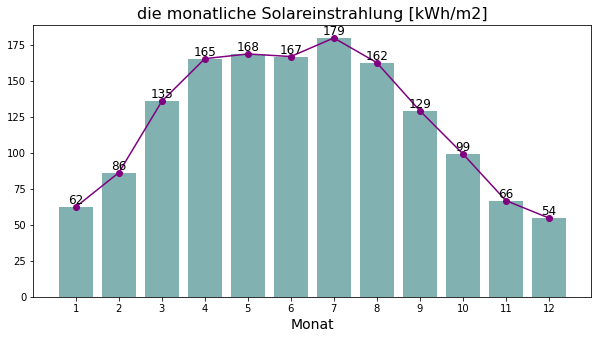

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# plot the line graph
ax.plot(df['month'], df['H(i)_m'], color='purple', marker='o')

# plot the bar chart
bars = ax.bar(df['month'], df['H(i)_m'], color='#046563', alpha=0.5)

# set the labels and title
ax.set_xticks(df['month'])
ax.set_xlabel('Monat', fontsize=14)
ax.set_title('die monatliche Solareinstrahlung [kWh/m2]',fontsize=16)

# add the y-axis values to the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, int(height), ha='center', va='bottom', fontsize=12)

# display the plot
plt.show()
